In [ ]:
pip install gdown

In [ ]:
# https://drive.google.com/file/d/13CGK72Aeq7AkmfjZKvGUxDnE2NexG8cz/view?usp=drive_link

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URL format for gdown
# url = 'https://docs.google.com/spreadsheets/d/1KYdWOWtWRKB4NC1mfYAsfB2VzVR5zSJa8oDiZcdVVok/'
url = 'https://drive.google.com/uc?id=1M3Ez5HXedYB0OvCvAMkHBS-b6L5Bpo-E'

# Output file name, csv is the input file format
output = 'Domestic Average Price of Fuel In Nigeria (1985-2024).csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1M3Ez5HXedYB0OvCvAMkHBS-b6L5Bpo-E
To: /content/Domestic Average Price of Fuel In Nigeria (1985-2024).csv
100%|██████████| 6.78k/6.78k [00:00<00:00, 2.65MB/s]


'Domestic Average Price of Fuel In Nigeria (1985-2024).csv'

In [ ]:
# Load the data from the downloaded excel file
fuel_data = pd.read_csv(output)
# Inspect top 5 rows
fuel_data.head(650)

,Month_Year,Price in Naira Per Litre
0,Jan 1985,0.20
1,Feb 1985,0.20
2,Mar 1985,0.20
3,Apr 1985,0.20
4,May 1985,0.20
...,...,...
468,Jan 2024,668.30
469,Feb 2024,679.36
470,Mar 2024,696.79
471,Apr 2024,701.24


In [ ]:
print(fuel_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month_Year                473 non-null    object 
 1   Price in Naira Per Litre  472 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB
None


In [ ]:
print(fuel_data.describe())

       Price in Naira Per Litre
count                472.000000
mean                  69.102521
std                  107.184750
min                    0.200000
25%                   11.000000
50%                   40.000000
75%                   97.000000
max                  701.240000


In [ ]:
fuel_data.tail()

,Month_Year,Price in Naira Per Litre
468,Jan 2024,668.30
469,Feb 2024,679.36
470,Mar 2024,696.79
471,Apr 2024,701.24
472,Metadata: This file was processed on 2024-06-1...,NaN


In [ ]:
fuel_data_cleaned = fuel_data[~fuel_data['Month_Year'].str.contains('Metadata:')]
fuel_data_cleaned.tail()

,Month_Year,Price in Naira Per Litre
467,Dec 2023,671.86
468,Jan 2024,668.30
469,Feb 2024,679.36
470,Mar 2024,696.79
471,Apr 2024,701.24


In [ ]:
### Converting into date time format for month

fuel_data_cleaned.index = pd.to_datetime(fuel_data_cleaned.index, format='%b %Y')
# fuel_data_cleaned.set_index('Month_Year', inplace=True) # No longer needed
fuel_data_cleaned.head()

,Price in Naira Per Litre
Month_Year,
1985-01-01,0.2
1985-02-01,0.2
1985-03-01,0.2
1985-04-01,0.2
1985-05-01,0.2


In [ ]:
print(fuel_data_cleaned.isnull().sum())
print(fuel_data_cleaned.duplicated().sum())


Price in Naira Per Litre    0
dtype: int64
370


In [ ]:
## Dropping duplucates
fuel_data_cleaned = fuel_data_cleaned.drop_duplicates()


In [ ]:
### Summary Staticts

print(fuel_data_cleaned.describe())


       Price in Naira Per Litre
count                102.000000
mean                 195.004608
std                  167.899699
min                    0.200000
25%                  145.297500
50%                  150.225000
75%                  172.980000
max                  701.240000


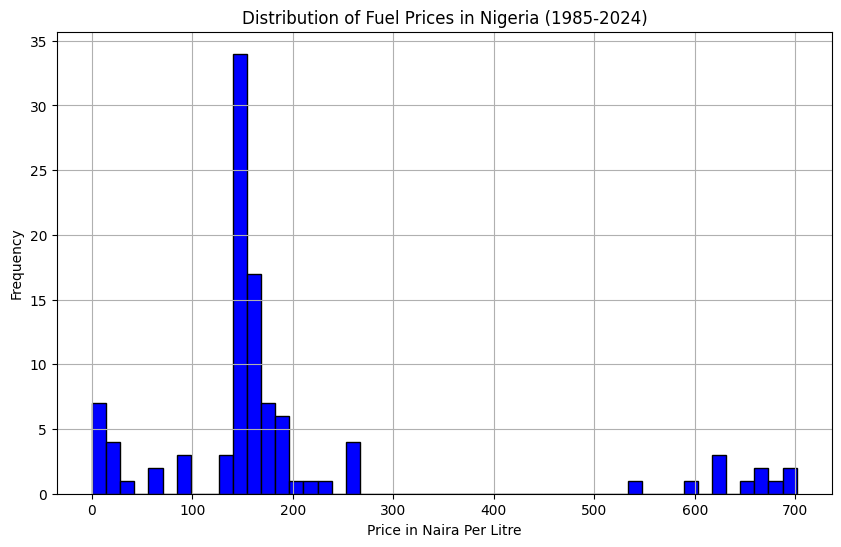

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(fuel_data_cleaned['Price in Naira Per Litre'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Fuel Prices in Nigeria (1985-2024)')
plt.xlabel('Price in Naira Per Litre')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




1. The distribution is right-skewed,
2. This suggests that while lower prices are more common, there are occasional periods with very high fuel prices.
This suggests that while lower prices are more common, there are occasional periods with very high fuel prices.
3. The highest frequency is seen around the 200 Naira per litre range.
4. There are notable gaps between clusters of prices, suggesting periods of stability followed by significant price jumps.

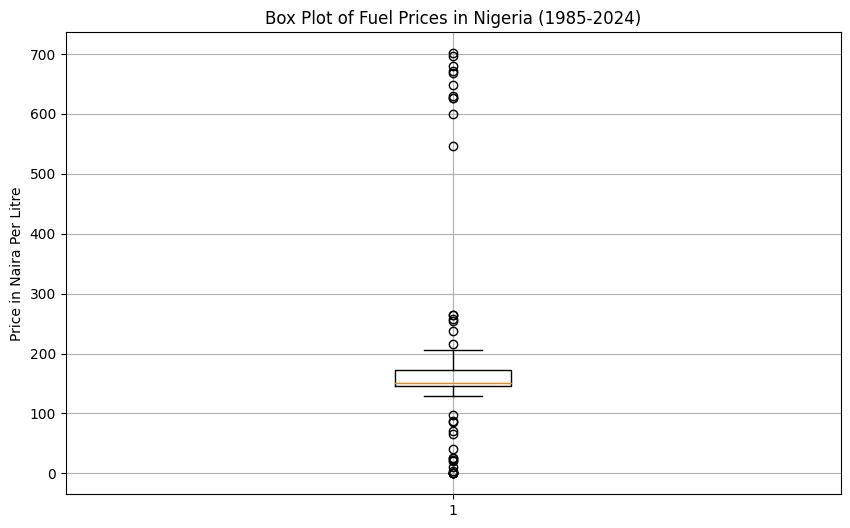

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(fuel_data_cleaned['Price in Naira Per Litre'])
plt.title('Box Plot of Fuel Prices in Nigeria (1985-2024)')
plt.ylabel('Price in Naira Per Litre')
plt.grid(True)
plt.show()


Price Concentration: Majority of prices are between 100 and 200 Naira.


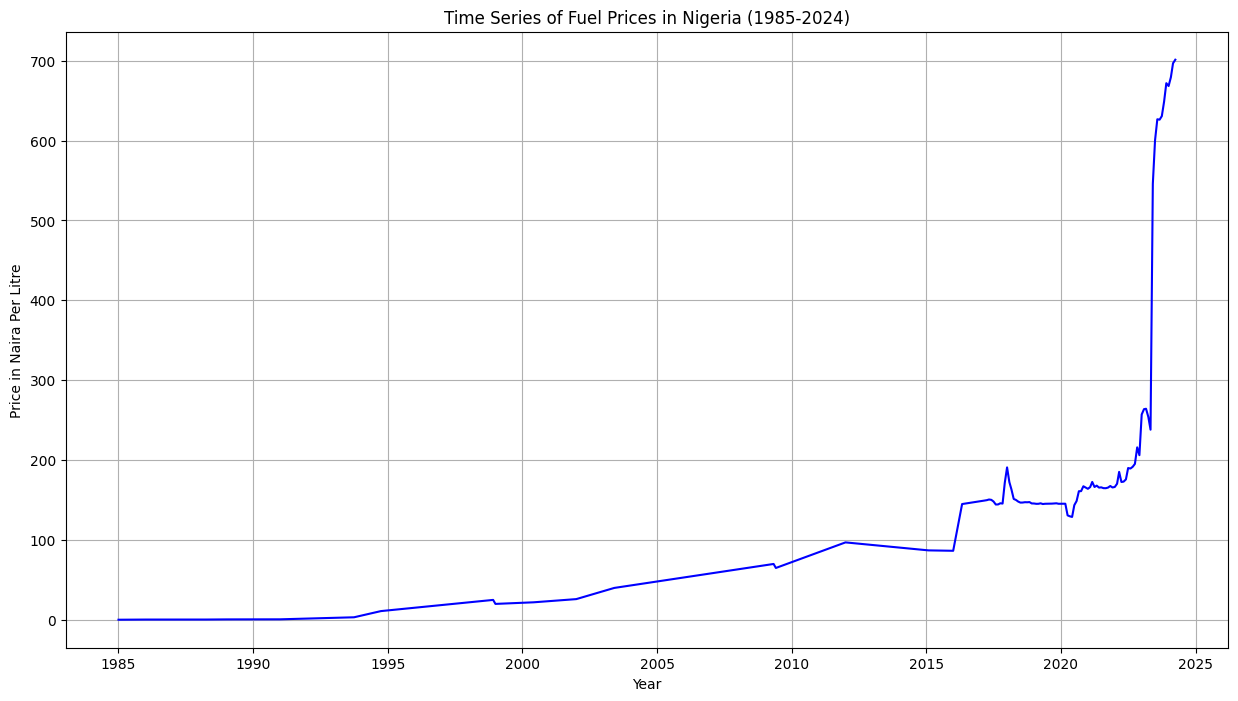

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(fuel_data_cleaned.index, fuel_data_cleaned['Price in Naira Per Litre'], color='blue')
plt.title('Time Series of Fuel Prices in Nigeria (1985-2024)')
plt.xlabel('Year')
plt.ylabel('Price in Naira Per Litre')
plt.grid(True)
plt.show()


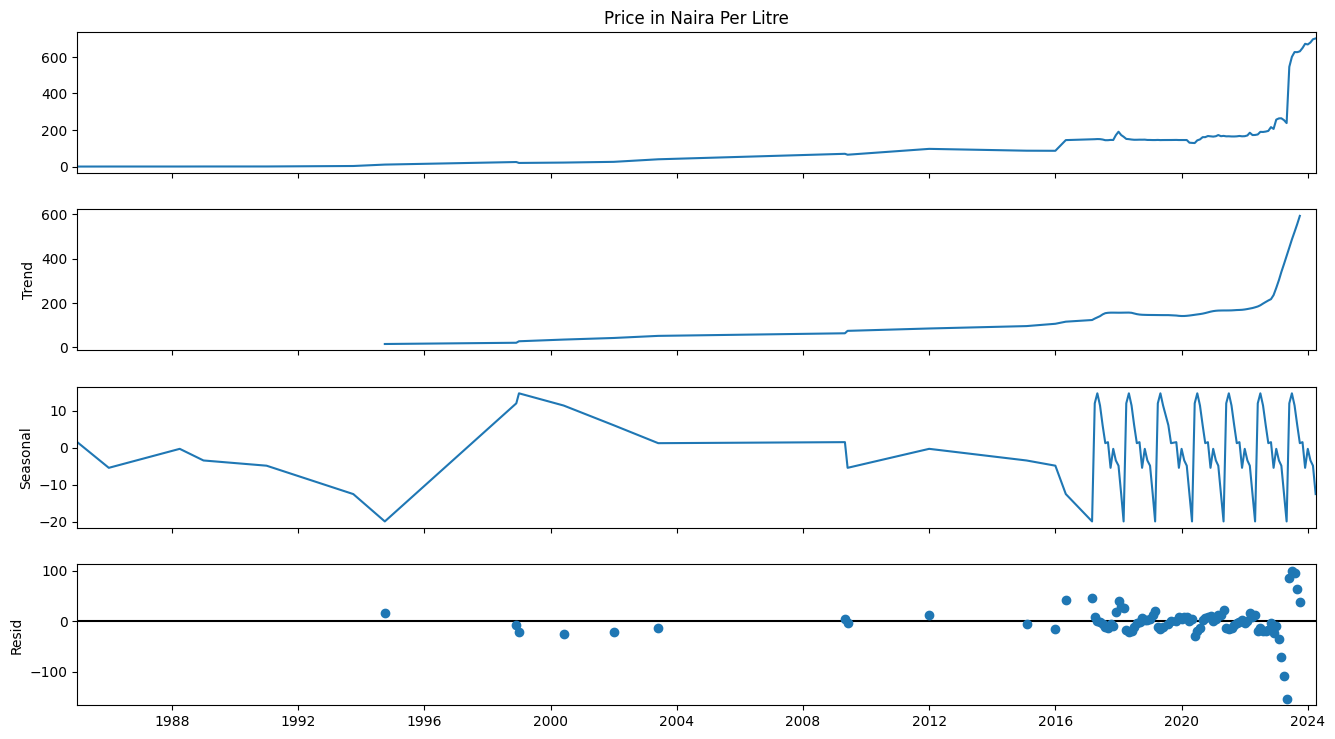

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(fuel_data_cleaned['Price in Naira Per Litre'], model='additive', period=12)
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches(15, 8)
plt.show()


Key Takeaways

    1. The trend component shows a clear and steady increase in fuel prices, highlighting a long-term upward movement.
    2. Seasonal Patterns: The seasonal component reveals regular fluctuations
    .

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(fuel_data_cleaned['Price in Naira Per Litre'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: 1.0735255844022455
p-value: 0.9949842186876896


High p-value (0.995) is high:  This is much higher than 0.05, indicating that the test in the time series is not stationary. This means the data has  patterns that change over time, such as trends (upward or downward movement) or seasonal effects (regular cycles).


we can use log transformation ..

<Figure size 1500x600 with 0 Axes>

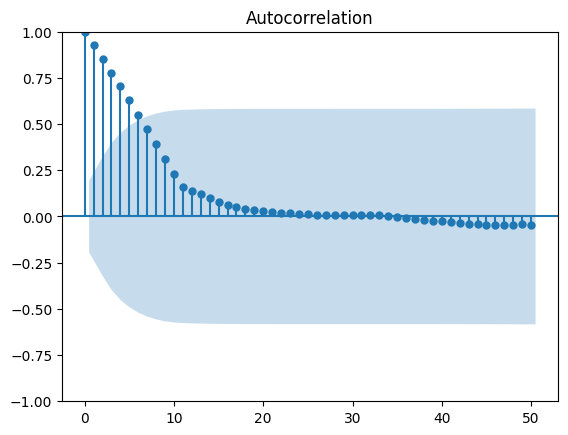

In [ ]:
## Auto correliation and partial correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 6))
plot_acf(fuel_data_cleaned['Price in Naira Per Litre'], lags=50)
plt.show()

# plt.figure(figsize=(15, 6))
# plot_pacf(fuel_data_cleaned['Price in Naira Per Litre'], lags=50)
# plt.show()


    1. The first few lags show a high positive correlation.
    2. The correlation decreases as the lag increases.
  


In [ ]:
autocorrelation = fuel_data_cleaned['Price in Naira Per Litre'].autocorr(lag=1)
print('Autocorrelation with lag 1:', autocorrelation)


Autocorrelation with lag 1: 0.9809237300512768


1. The autocorrelation value of 0.98 indicates that the price of fuel in one month is almost the same as its price in the previous month.
2. This strong similarity shows that the prices are very closely linked from one month to the next.
3. it is a clear sign that . Specifically, it supports the observation that fuel prices have been steadily increasing over time. This helps us understand that the rising prices are not just random fluctuations, but part of a consistent upward trend.

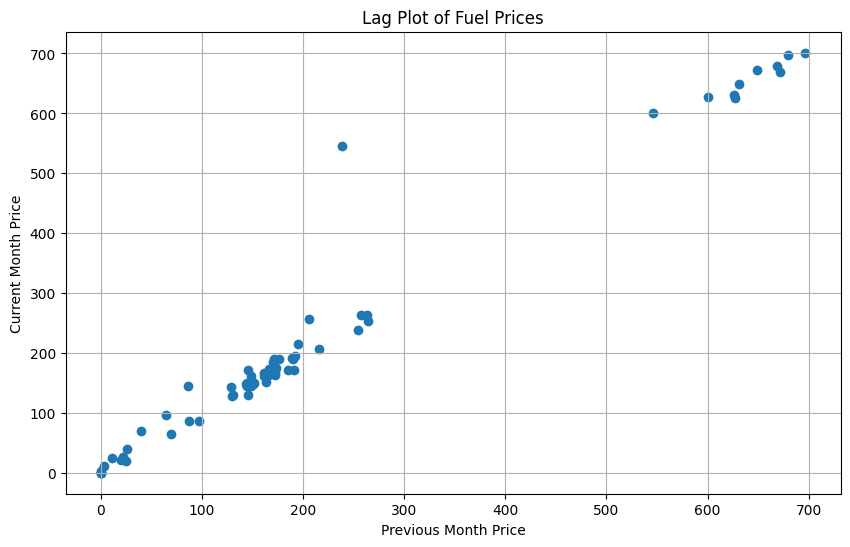

In [ ]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(fuel_data_cleaned['Price in Naira Per Litre'])
plt.title('Lag Plot of Fuel Prices')
plt.xlabel('Previous Month Price')
plt.ylabel('Current Month Price')
plt.grid(True)
plt.show()


1. The points lie close to a straight line, indicating a strong linear relationship between the current and previous month's fuel prices.
2.  This  may suggests that the fuel price in one month is strongly dependent on the price in the previous month.